In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
from sklearn.metrics import mean_squared_error


In [137]:
# Load Series, aggiornati al 15/06/2022
GOOGL=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/GOOGL.csv")
NKE = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/NKE.csv")
HD = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/HD.csv")
JPM = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/JPM.csv")
BA= pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/BA.csv")
JNJ = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/JNJ.csv")
AAPL=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/AAPL.csv")
INTC=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/INTC.csv")
MCD=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/MCD.csv")
TRV=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/TRV.csv")

In [138]:
#GOOGL.info()
# faccio un merge verticale dei dati, creo la colonna di indentificazione del titolo e formatto la data
GOOGL.insert(7,column="Stock",value=np.repeat("GOOGL",3525))
NKE.insert(7,column="Stock",value=np.repeat("NKE",3525))
HD.insert(7, column="Stock", value=np.repeat("HD", 3525))
AAPL.insert(7, column="Stock", value=np.repeat("AAPL", 3525))
BA.insert(7, column="Stock", value=np.repeat("BA", 3525))
INTC.insert(7, column="Stock", value=np.repeat("INTC", 3525))
JNJ.insert(7, column="Stock", value=np.repeat("JNJ", 3525))
MCD.insert(7, column="Stock", value=np.repeat("MCD", 3525))
TRV.insert(7, column="Stock", value=np.repeat("TRV", 3525))
JPM.insert(7, column="Stock", value=np.repeat("JPM", 3525))
Series = pd.merge(GOOGL, NKE, how='outer')
Series = pd.merge(Series, HD, how='outer')
Series = pd.merge(Series, AAPL, how = 'outer')
Series = pd.merge(Series, BA, how='outer')
Series = pd.merge(Series, INTC, how = 'outer')
Series = pd.merge(Series, JNJ, how = 'outer')
Series = pd.merge(Series, MCD, how = 'outer')
Series = pd.merge(Series, TRV, how = 'outer')
Series = pd.merge(Series, JPM, how = 'outer')
Series['Date']=pd.to_datetime(Series['Date'],)
#Series = Series.set_index('Date')
Series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35250 entries, 0 to 35249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       35250 non-null  datetime64[ns]
 1   Open       35250 non-null  float64       
 2   High       35250 non-null  float64       
 3   Low        35250 non-null  float64       
 4   Close      35250 non-null  float64       
 5   Adj Close  35250 non-null  float64       
 6   Volume     35250 non-null  int64         
 7   Stock      35250 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.4+ MB


ANALISI ESPLORATIVA:


Verrà effettuata un'analisi esplorativa sia grafica sull'andamento dei prezzi di apertura, sia volta a studiare la forza della correlazione seriale
di ogni titolo ed eventuale presenza di cointegrazione fra i titoli.

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

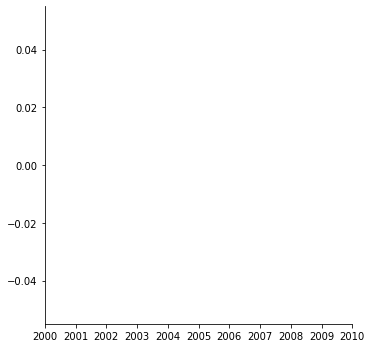

In [128]:
sns.relplot(x="Date", y="Open", data=Series[Series['Stock']!="GOOGL"], kind="line", hue="Stock")
plt.ylabel("Open Price")
plt.title("Stocks Open Prices")
sns.relplot(x="Date", y="Open", data=Series[Series['Stock']=="GOOGL"], kind = "line")
plt.title("GOOGL Stock Open Price")
plt.ylabel("Open Price")
#------- serie insieme -----------------
sns.relplot(x="Date", y="Open", data=Series, kind='line', hue="Stock")
plt.title("Stock Open Prices")
plt.ylabel("Open Price")

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


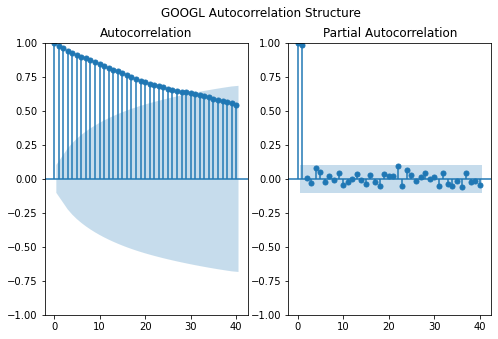

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


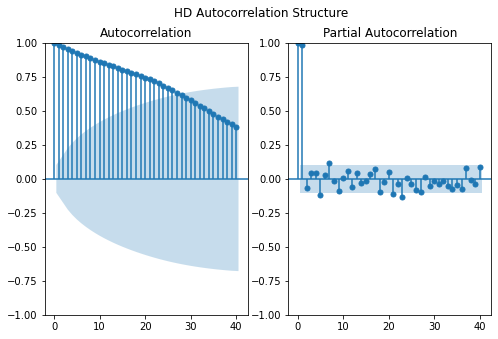

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


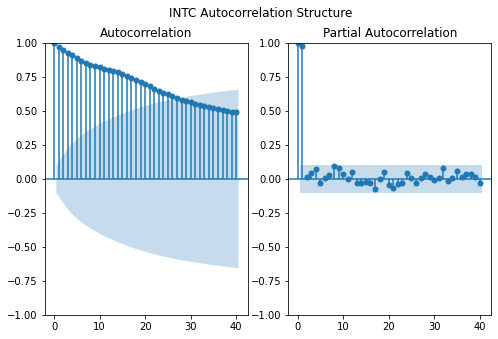

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


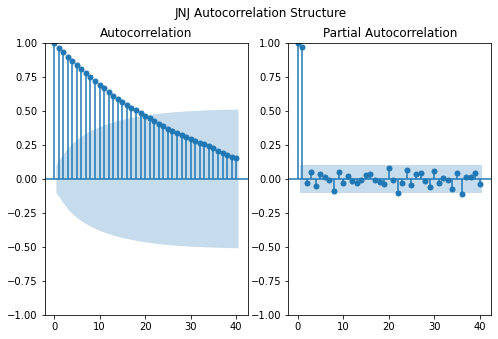

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


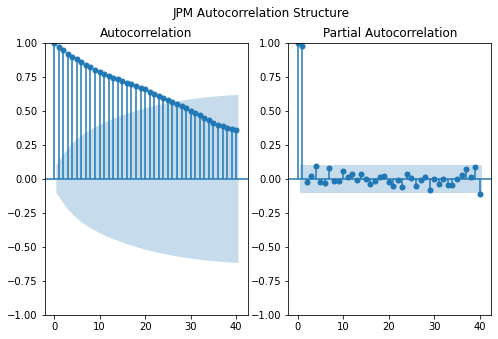

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


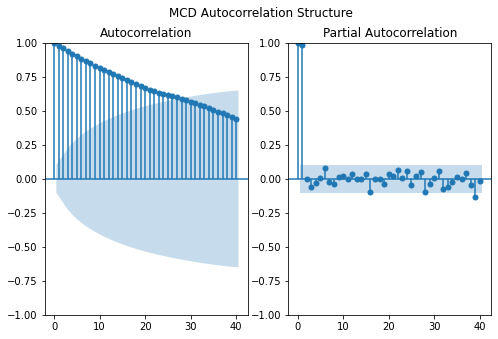

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


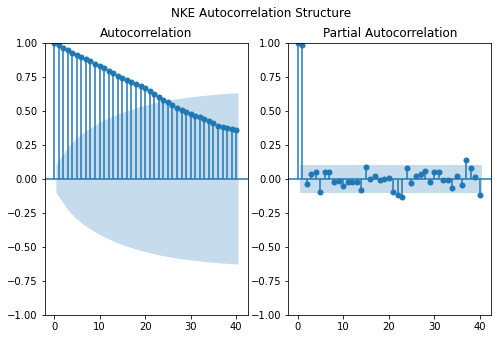

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


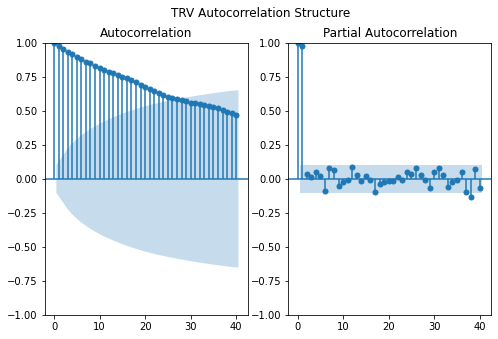

In [65]:
for s in series2.columns.values:
    fig, ax = plt.subplots(1, 2, figsize=(8,5))
    plot_acf(series2[s].tail(365), lags=40, ax=ax[0])
    plot_pacf(series2[s].tail(365), lags=40, ax=ax[1])
    plt.suptitle(s + " Autocorrelation Structure")
    plt.show()


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


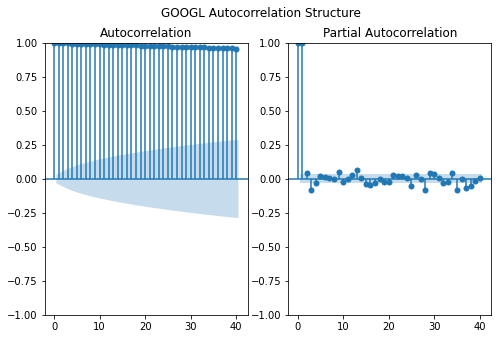

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


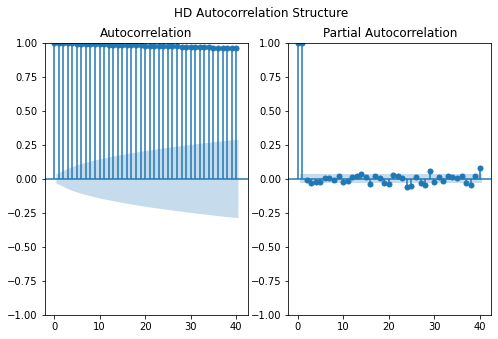

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


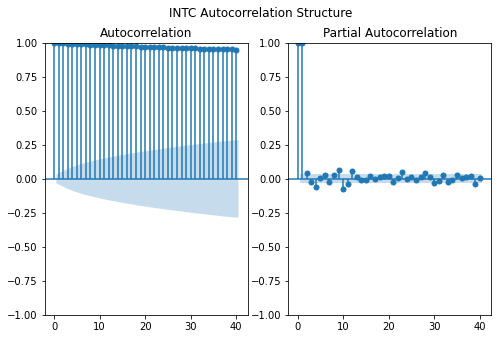

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


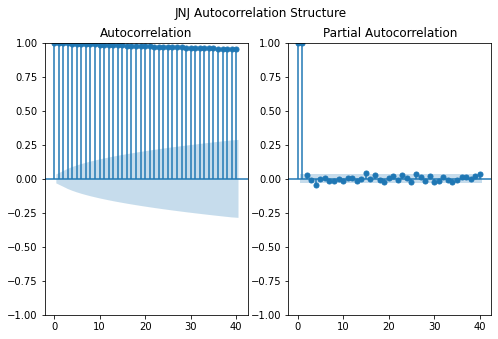

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


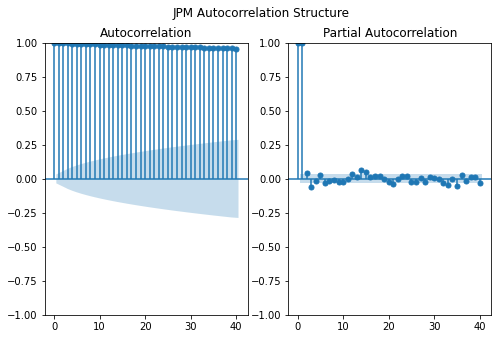

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


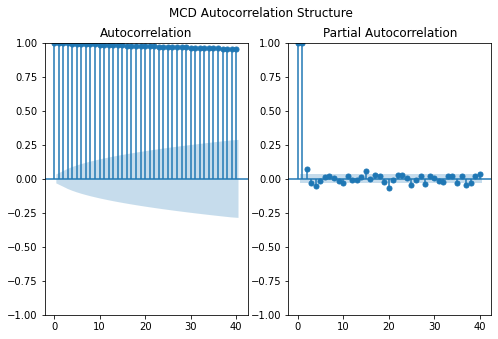

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


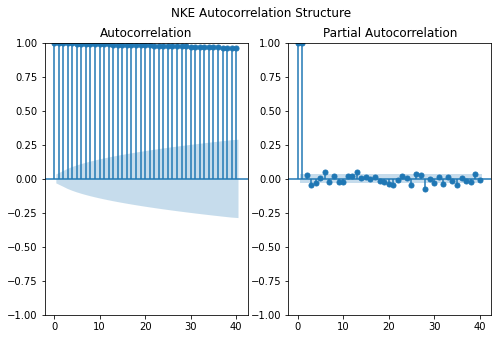

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


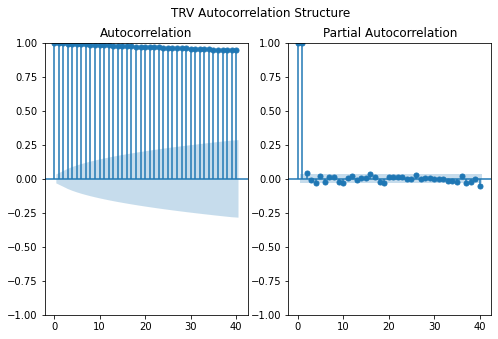

In [66]:
# ACF E PACF di ogni serie; utile anche a capire l'ordine del modello ARIMA
for s in series2.columns.values:
    fig, ax = plt.subplots(1, 2, figsize=(8,5))
    plot_acf(series2[s], lags=40, ax=ax[0])
    plot_pacf(series2[s], lags=40, ax=ax[1])
    plt.suptitle(s + " Autocorrelation Structure")
    plt.show()

In [139]:
##
## TEST DI COINTEGRAZIONE DI JOHANSEN
##
#Series = Series.set_index('Date')
series2 = pd.pivot(data=Series, index="Date", columns="Stock", values="Open") # time series in wider format.
series2.set_index(Series['Date'])
# Definisco una nuova funzione che permette di visualizzare anche un summary del test
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
    # Summary
    print("\nJohanson's Cointegration Test and Summary \n",'--'*20)
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
    
cointegration_test(series2)

# Il test condotto sulle serie risulta essere non significativo ad eccezzione sulla serie Apple, che quindi risulta cointegrata con le altre. 
# A questo punto si procederà non considerando la serie AAPL in modo da non dover complicare i modelli baseline, ed utilizzare la modellistica ARIMA.
# Prima di ciò si ripete il test di cointegrazione di johansen su tutte le serie ad eccezzione della serie APPLE
series2 = series2.drop("AAPL", axis=1)
cointegration_test(series2)
series2 = series2.drop("BA", axis=1)
cointegration_test(series2)

ValueError: Length mismatch: Expected 3525 rows, received array of length 35250

In [44]:
# ADF test per verificare la stazionarietà in media; (relativo a modelli arima; verrà preso in considerazione soltanto l'ultimo anno
# in quanto è ovvio che prendendo tutta la finestra temporale a disposizione si incorrerà al problema della radice unitaria)
series2 = series2.tail(254)
test_adf = {}
for s in series2.columns.values:
    print('Augmented Dickey-Fuller Results for',s,'Series:')
    test_adf[s] = adfuller(series2[s],autolag = "AIC")   
    ADFresult = pd.Series(test_adf[s][0:4], index = ['ADF Test Statistic','P-Value','# Lags Used', '# Observation Used'])
    print(ADFresult,'\n')
    # non si rigetta l'ipotesi di radice unitaria per nessuna serie


Augmented Dickey-Fuller Results for GOOGL Series:
ADF Test Statistic     -1.207068
P-Value                 0.670548
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dickey-Fuller Results for HD Series:
ADF Test Statistic     -0.915079
P-Value                 0.782966
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dickey-Fuller Results for INTC Series:
ADF Test Statistic     -0.832012
P-Value                 0.809537
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dickey-Fuller Results for JNJ Series:
ADF Test Statistic     -1.973371
P-Value                 0.298369
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dickey-Fuller Results for JPM Series:
ADF Test Statistic     -0.354686
P-Value                 0.917394
# Lags Used             0.000000
# Observation Used    253.000000
dtype: float64 

Augmented Dic

MODELLAZIONE ARIMA



In [172]:
# cerco per ogni serie il miglior modello ARIMA e valuto le previsioni tramite MSE.
# Utilizzo come serie 1 anno; dal 1-01-2021 al 31-12-2021; come finestra previsiva utilizzo 10 giorni
# Utilizzo una griglia di ricerca dei parametri
# definizione della finestra temporale per train e test set

## Definizione de train e test set
train=series2.index.to_series().between('2021-01-01', '2021-12-31')
train=series2[train]
test=series2.index.to_series().between('2022-01-01', '2022-01-20')
test = series2[test]
p = d = q = range (0,3)
warnings.filterwarnings("ignore")

order = list(product(p, d , q))
for param in order:
    try:
        modello_AAPL = ARIMA(train['AAPL'], 
        order = param)
        results = modello_AAPL.fit()
        print("Arima {} - AIC:{}".format(param, results.aic))
    except:
        continue     






Arima (0, 0, 0) - AIC:2065.682197675589
Arima (0, 0, 1) - AIC:1781.0515494314277
Arima (0, 0, 2) - AIC:1574.559891110397
Arima (0, 1, 0) - AIC:1132.347031389902
Arima (0, 1, 1) - AIC:1133.2597965380478
Arima (0, 1, 2) - AIC:1135.2560514567253
Arima (0, 2, 0) - AIC:1315.880555544344
Arima (0, 2, 1) - AIC:1134.795056064682
Arima (0, 2, 2) - AIC:1135.4676927816697
Arima (1, 0, 0) - AIC:1144.4341044153853
Arima (1, 0, 1) - AIC:1145.5088678274928
Arima (1, 0, 2) - AIC:1147.4912798430623
Arima (1, 1, 0) - AIC:1133.2581467218217
Arima (1, 1, 1) - AIC:1135.257187202865
Arima (1, 1, 2) - AIC:1137.2582392762806
Arima (1, 2, 0) - AIC:1235.381366814679
Arima (1, 2, 1) - AIC:1135.4874428682233
Arima (1, 2, 2) - AIC:1137.358101993285
Arima (2, 0, 0) - AIC:1145.498917595433
Arima (2, 0, 1) - AIC:1147.1314788198583
Arima (2, 0, 2) - AIC:1148.9223836312199
Arima (2, 1, 0) - AIC:1135.256770770302
Arima (2, 1, 1) - AIC:1137.2572619078258
Arima (2, 1, 2) - AIC:1134.5878126052316
Arima (2, 2, 0) - AIC:1203

In [150]:
test.head(10)

Stock,AAPL,BA,GOOGL,HD,INTC,JNJ,JPM,MCD,NKE,TRV
Date,,,,,,,,,,
2022-01-03,177.830002,204.000000,2901.100098,416.570007,51.650002,170.210007,159.860001,269.489990,167.529999,156.919998
2022-01-04,182.630005,211.300003,2907.919922,408.640015,53.570000,171.059998,164.309998,269.500000,165.880005,157.550003
2022-01-05,179.610001,216.639999,2888.399902,414.000000,54.189999,172.000000,167.820007,269.299988,166.490005,160.500000
2022-01-06,172.699997,214.639999,2739.969971,408.559998,54.610001,172.149994,166.910004,268.119995,162.089996,163.229996
2022-01-07,172.889999,212.979996,2762.909912,403.359985,54.189999,171.460007,165.669998,268.559998,160.770004,162.259995
2022-01-10,169.080002,214.259995,2701.560059,387.399994,53.970001,173.690002,169.070007,266.709991,150.520004,167.619995
2022-01-11,172.320007,209.000000,2760.139893,388.070007,55.500000,172.990005,168.259995,263.489990,150.479996,164.710007
2022-01-12,176.119995,217.089996,2823.000000,388.290009,56.139999,169.610001,168.460007,263.369995,152.130005,163.330002
2022-01-13,175.779999,222.250000,2830.800049,392.510010,56.000000,169.000000,168.339996,261.410004,153.199997,163.410004


In [ ]:

#best_models={}
#for s in series2.columns.values:
#    models = {}
#    for i in p:
#        for j in q:
#            order = (i,d,j)
#            model= ARIMA(train[s],order=order)
#            model_fit = model.fit()
#            aic=model_fit.aic
#            print(order, aic)

DATA PREPROCESSING:

Costruzione dei seguenti indicatori:
 - Rollinng Standard deviation per il prezzo di chiusura degli ultimi 6 giorni
 - Moving Average Convergence Divergence
 - Average Directional Index

In [72]:
series2 = pd.pivot(data=Series, index="Date", columns="Stock", values="Close")
# definizione della finestra temporale per train e test set
train=series2.index.to_series().between('2021-01-01', '2021-12-31')
test=series2.index.to_series().between('2022-01-01', '2022-01-10')
rolling_low = {}
rolling_high = {}
for s in series2.columns.values:
    rolling_mean = series2[s].rolling(20).mean()
    rolling_std = series2[s].rolling(20).std()*2
    rolling_low[s] = rolling_mean[2]-rolling_std[2]
    rolling_high[s] = rolling_mean[2]+rolling_std[2];

# JPM.insert(8, column="RSD_close_high", value=JPM['Close'].rolling(6).mean()-JMP['Close'].rolling(6).std()*2)

In [122]:
del [Series]